In [4]:
import os
import json

In [5]:
def cal_num_ood_acc(test_data_num, acc):
    true_test_num = 0
    total_num = 0
    line_acc = []
    for i, line in enumerate(acc):
        true_test_num_line = 0
        total_num_line = 0
        for j, number in enumerate(line):
            if i != j:
                true_test_num += int(number * test_data_num[i])
                total_num += 100 * test_data_num[i]
                true_test_num_line += int(number * test_data_num[i])
                total_num_line += 100 * test_data_num[i]
        line_acc.append(true_test_num_line / total_num_line)
    total_acc = true_test_num / total_num
    return line_acc, total_acc

def cal_num_ind_acc(test_data_num, acc):
    true_test_num = 0
    total_num = 0
    line_acc = []
    for i, line in enumerate(acc):
        true_test_num_line = 0
        total_num_line = 0
        for j, number in enumerate(line):
            if i == j:
                true_test_num += int(number * test_data_num[i])
                total_num += 100 * test_data_num[i]
                true_test_num_line += int(number * test_data_num[i])
                total_num_line += 100 * test_data_num[i]
        line_acc.append(true_test_num_line / total_num_line)
    total_acc = true_test_num / total_num
    return line_acc, total_acc

def cal_avg_ood_acc(acc):
    true_test_num = 0
    total_num = 0
    line_acc = []
    for i, line in enumerate(acc):
        true_test_num_line = 0
        total_num_line = 0
        for j, number in enumerate(line):
            if i != j:
                true_test_num += number
                total_num += 100
                true_test_num_line += number
                total_num_line += 100
        line_acc.append(true_test_num_line / total_num_line)
    total_acc = true_test_num / total_num
    return line_acc, total_acc

def cal_avg_ind_acc(acc):
    true_test_num = 0
    total_num = 0
    line_acc = []
    for i, line in enumerate(acc):
        true_test_num_line = 0
        total_num_line = 0
        for j, number in enumerate(line):
            if i == j:
                true_test_num += number
                total_num += 100
                true_test_num_line += number
                total_num_line += 100
        line_acc.append(true_test_num_line / total_num_line)
    total_acc = true_test_num / total_num
    return line_acc, total_acc

def read_results(file_name, sub=10, line_num=-1, data=None):
    print(file_name)
    data_list = []
    with open(file_name) as f:
        for line in f:
            data = json.loads(line)
            data_list.append(data)
    result = data_list[line_num]
    if sub == 10:
        test_data_num = [308, 865, 974, 530, 1500, 174]
    elif sub == 50:
        test_data_num = [1811, 3530, 7370, 3122, 7500, 2096]
    elif sub == 100:
        test_data_num = [3737, 6255, 14873, 4794, 15000, 3349]
    elif sub == 150:
        test_data_num = [6266, 9436, 23170, 7693, 22500, 5353]


    total_test_data_num = sum(test_data_num)

    acc = result['acc']
    print('accuracy:')
    print(acc)

    line_acc, total_num_ood_acc = cal_num_ood_acc(test_data_num, acc)
    # print('the ood accuracy of each class(by data number):')
    # print(line_acc)
    print('the total ood accuracy(by data number):')
    print(round(total_num_ood_acc,4))

    line_acc, total_num_ind_acc = cal_num_ind_acc(test_data_num, acc)
    # print('the ind accuracy of each class(by data number):')
    # print(line_acc)
    print('the total ind accuracy(by data number):')
    print(round(total_num_ind_acc,4))
    rounds = result['round']
    print('round:')
    print(rounds)
    times = result['total_train_time']
    print('times:')
    print(times)


In [9]:
file_name='./ours/ViT-B-32_domainnet_sub150_sra0.3_sramcluster.json'
read_results(file_name, sub=150, line_num=-1, data='domainnet')

./ours/ViT-B-32_domainnet_sub150_sra0.3_sramcluster.json
accuracy:
[[83.4663, 76.0068, 88.5196, 77.993, 61.4933, 59.1818], [83.4663, 76.0068, 88.5196, 77.993, 61.4933, 59.1818], [83.4663, 76.0068, 88.5196, 77.993, 61.4933, 59.1818], [83.4663, 76.0068, 88.5196, 77.993, 61.4933, 59.1818], [83.4663, 76.0068, 88.5196, 77.993, 61.4933, 59.1818], [83.4663, 76.0068, 88.5196, 77.993, 61.4933, 59.1818]]
the total ood accuracy(by data number):
0.743
the total ind accuracy(by data number):
0.7514
round:
0
times:
1344.4099621772766


In [43]:
file_name='./ours/ViT-B-32_domainnet_sub150_sra0.4_sramcluster.json'
read_results(file_name, sub=150, line_num=-1, data='domainnet')

./ours/ViT-B-32_domainnet_sub150_sra0.4_sramcluster.json
accuracy:
[[83.5461, 77.9674, 89.0505, 78.7469, 62.9067, 59.929], [83.5461, 77.9674, 89.0505, 78.7469, 62.9067, 59.929], [83.5461, 77.9674, 89.0505, 78.7469, 62.9067, 59.929], [83.5461, 77.9674, 89.0505, 78.7469, 62.9067, 59.929], [83.5461, 77.9674, 89.0505, 78.7469, 62.9067, 59.929], [83.5461, 77.9674, 89.0505, 78.7469, 62.9067, 59.929]]
the total ood accuracy(by data number):
0.7521
the total ind accuracy(by data number):
0.7612
round:
0
times:
1753.4956707954407


In [15]:
file_name='./ours_dp/ViT-B-32_domainnet_sub50_sra1.0_sramaverage_dps0.05_dpp0.5.json'
read_results(file_name, sub=50, line_num=-1, data='domainnet')

./ours_dp/ViT-B-32_domainnet_sub50_sra1.0_sramaverage_dps0.05_dpp0.5.json
accuracy:
[[90.7234, 83.1161, 92.5509, 87.6041, 56.6667, 71.708], [90.7234, 83.1161, 92.5509, 87.6041, 56.6667, 71.708], [90.7234, 83.1161, 92.5509, 87.6041, 56.6667, 71.708], [90.7234, 83.1161, 92.5509, 87.6041, 56.6667, 71.708], [90.7234, 83.1161, 92.5509, 87.6041, 56.6667, 71.708], [90.7234, 83.1161, 92.5509, 87.6041, 56.6667, 71.708]]
the total ood accuracy(by average):
0.8039
the total ood accuracy(by data number):
0.8083
the total ind accuracy(by average):
0.8039
the total ind accuracy(by data number):
0.782
round:
0
times:
1.7478992938995361


(0.8039486666666669,
 0.8083331629242204,
 0.8039486666666666,
 0.7820197412403161,
 0,
 1.7478992938995361)

In [5]:
file_name='./fedavgDBE/ViT-B-32_domainnet_sub150.json'
read_results(file_name, sub=150, line_num=-2, data='domainnet')

./fedavgDBE/ViT-B-32_domainnet_sub150.json
accuracy:
[[86.9933, 77.9568, 90.0432, 78.058, 23.3333, 61.3488], [84.1047, 81.6236, 89.0764, 79.2149, 21.3556, 59.107], [84.759, 75.9962, 91.4588, 77.0051, 22.4178, 61.4048], [84.1047, 77.713, 89.3483, 81.7886, 22.9289, 59.2752], [82.3013, 70.7503, 87.6349, 75.4842, 33.5911, 50.6819], [85.0622, 76.6109, 90.3625, 77.798, 23.9644, 66.6916]]
the total ood accuracy(by average):
0.6797
the total ood accuracy(by data number):
0.682
the total ind accuracy(by average):
0.7369
the total ind accuracy(by data number):
0.6956
round:
5
times:
1160.2867476940155


(0.6797341,
 0.6820127657287215,
 0.7369116666666665,
 0.6955841328710796,
 5,
 1160.2867476940155)

In [25]:
file_name='./fedavgDBE/ViT-B-32_domainnet_sub50.json'
read_results(file_name, sub=50, line_num=-2, data='domainnet')

./fedavgDBE/ViT-B-32_domainnet_sub50.json
accuracy:
[[91.8277, 81.2465, 92.673, 87.6682, 35.1867, 68.3683], [89.122, 85.0142, 91.6282, 87.0275, 31.72, 65.5057], [87.1894, 78.5836, 94.0163, 83.4721, 29.04, 66.1737], [89.7294, 80.7082, 92.768, 90.4869, 32.2267, 65.8397], [88.1281, 77.7337, 90.6513, 85.2659, 45.2933, 60.687], [88.7355, 80.5949, 92.7001, 85.426, 34.44, 74.7615]]
the total ood accuracy(by data number):
0.7421
the total ind accuracy(by data number):
0.7622
round:
22
times:
1693.605651140213


In [26]:
file_name='./fedavgDBE/ViT-B-32_domainnet_sub100.json'
read_results(file_name, sub=100, line_num=-2, data='domainnet')

./fedavgDBE/ViT-B-32_domainnet_sub100.json
accuracy:
[[89.5906, 81.4708, 92.2275, 82.2695, 28.32, 66.3482], [86.7006, 84.4764, 91.145, 82.6241, 24.1333, 65.1239], [87.0217, 79.8241, 93.4378, 79.4952, 25.28, 66.5273], [86.0583, 81.1671, 91.4072, 86.2745, 24.9, 64.7955], [85.3091, 75.8913, 90.1768, 78.9529, 37.7533, 55.9869], [87.5033, 81.4708, 92.0796, 82.0609, 27.5067, 71.5139]]
the total ood accuracy(by data number):
0.7179
the total ind accuracy(by data number):
0.7233
round:
6
times:
837.5919852256775


In [27]:
file_name='./fedavgDBE/ViT-B-32_domainnet_sub150.json'
read_results(file_name, sub=150, line_num=-2, data='domainnet')

./fedavgDBE/ViT-B-32_domainnet_sub150.json
accuracy:
[[86.9933, 77.9568, 90.0432, 78.058, 23.3333, 61.3488], [84.1047, 81.6236, 89.0764, 79.2149, 21.3556, 59.107], [84.759, 75.9962, 91.4588, 77.0051, 22.4178, 61.4048], [84.1047, 77.713, 89.3483, 81.7886, 22.9289, 59.2752], [82.3013, 70.7503, 87.6349, 75.4842, 33.5911, 50.6819], [85.0622, 76.6109, 90.3625, 77.798, 23.9644, 66.6916]]
the total ood accuracy(by data number):
0.682
the total ind accuracy(by data number):
0.6956
round:
5
times:
1160.2867476940155


./ours/ViT-B-32_data_sub50.json
accuracy:
[[90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172]]
the total ood accuracy(by average):
0.8070273333333334
the total ood accuracy(by data number):
0.8106903142081875
the total ind accuracy(by average):
0.8070273333333333
the total ind accuracy(by data number):
0.7887046285736757
round:
0
times:
54.14024591445923
./ours/ViT-B-32_data_sub50_fewshot_1_kd0.0.json
accuracy:
[[90.7234, 82.2663, 92.673, 87.7643, 58.9467, 71.5649], [90.7786, 82.2946, 92.768, 87.7002, 59.0133, 71.374], [90.8338, 82.2663, 92.7137, 87.7643, 59.0533, 71.4218], [90.8338, 82.2663, 92.7408, 87.9564, 58.7867, 71.5172], [90.889, 82.2663, 92.768, 87.6361, 59.1067, 71.5172], [90.7786, 82.3229, 92.686

<Figure size 1280x960 with 0 Axes>

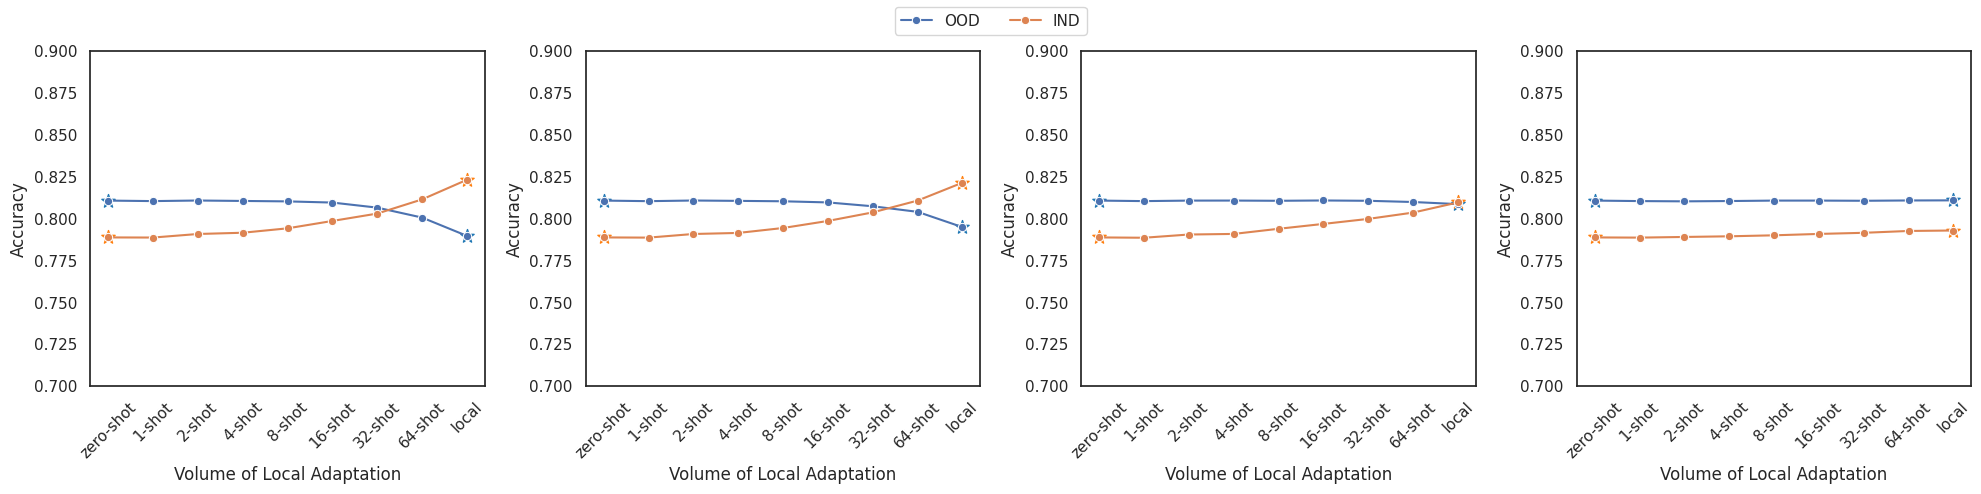

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

default_colors = sns.color_palette()
sns.set(style="white")

plt.figure(dpi=200)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sub = 50
fews = [1, 2, 4, 8, 16, 32, 64]
x_loc = [0, 1, 2, 3, 4, 5, 6]
kds = [0.0, 10.0, 100.0, 1000.0]
for i, kd in enumerate(kds):
    table_dict = {'x':[], 'x_label':[], 'ood': [], 'ind': []}
    # zero-shot
    file_name=f'./ours/ViT-B-32_data_sub{sub}.json'
    _, ood_acc, _, ind_acc, _, _ = read_results(file_name, sub=sub, line_num=-1)
    table_dict['x'].append(-1)
    table_dict['x_label'].append('zero-shot')
    table_dict['ood'].append(ood_acc)
    table_dict['ind'].append(ind_acc)

    for few, loc in zip(fews, x_loc):
        file_name=f'./ours/ViT-B-32_data_sub{sub}_fewshot_{few}_kd{kd}.json'
        _, ood_acc, _, ind_acc, _, _ = read_results(file_name, sub=sub, line_num=-1)
        table_dict['x'].append(loc)
        table_dict['x_label'].append(f'{few}-shot')
        table_dict['ood'].append(ood_acc)
        table_dict['ind'].append(ind_acc)

    # local
    file_name=f'./ours/ViT-B-32_data_sub{sub}_fewshot_full_kd{kd}.json'
    _, ood_acc, _, ind_acc, _, _ = read_results(file_name, sub=sub, line_num=-1)
    table_dict['x'].append(7)
    table_dict['x_label'].append('local')
    table_dict['ood'].append(ood_acc)
    table_dict['ind'].append(ind_acc)

    df = pd.DataFrame(table_dict)
    print(df)

    sns.lineplot(data=df, x='x', y='ood', marker='o', label='OOD', ax=axes[i], legend=False)
    sns.lineplot(data=df, x='x', y='ind', marker='o', label='IND', ax=axes[i], legend=False)


    axes[i].scatter(df['x'][0], df['ood'][0], color=default_colors[0], s=100, marker='*')
    axes[i].scatter(df['x'][0], df['ind'][0], color=default_colors[1], s=100, marker='*')
    axes[i].scatter(df['x'].iloc[-1], df['ood'].iloc[-1], color=default_colors[0], s=100, marker='*')
    axes[i].scatter(df['x'].iloc[-1], df['ind'].iloc[-1], color=default_colors[1], s=100, marker='*')


    axes[i].set_xticks(df['x'])
    axes[i].set_xticklabels(df['x_label'], rotation=45)

    axes[i].set_xlabel('Volume of Local Adaptation')
    axes[i].set_ylabel('Accuracy')

    axes[i].set_ylim(0.7, 0.9)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig('../../figures/test_local_adaptation.pdf')
plt.show()


./ours/ViT-B-32_data_sub50.json
accuracy:
[[90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172], [90.7786, 82.3229, 92.7001, 87.7643, 59.1333, 71.5172]]
the total ood accuracy(by average):
0.8070273333333334
the total ood accuracy(by data number):
0.8106903142081875
the total ind accuracy(by average):
0.8070273333333333
the total ind accuracy(by data number):
0.7887046285736757
round:
0
times:
54.14024591445923
./ours/ViT-B-32_data_sub50_fewshot_1_kd0.0.json
accuracy:
[[90.7234, 82.2663, 92.673, 87.7643, 58.9467, 71.5649], [90.7786, 82.2946, 92.768, 87.7002, 59.0133, 71.374], [90.8338, 82.2663, 92.7137, 87.7643, 59.0533, 71.4218], [90.8338, 82.2663, 92.7408, 87.9564, 58.7867, 71.5172], [90.889, 82.2663, 92.768, 87.6361, 59.1067, 71.5172], [90.7786, 82.3229, 92.686

<Figure size 1280x960 with 0 Axes>

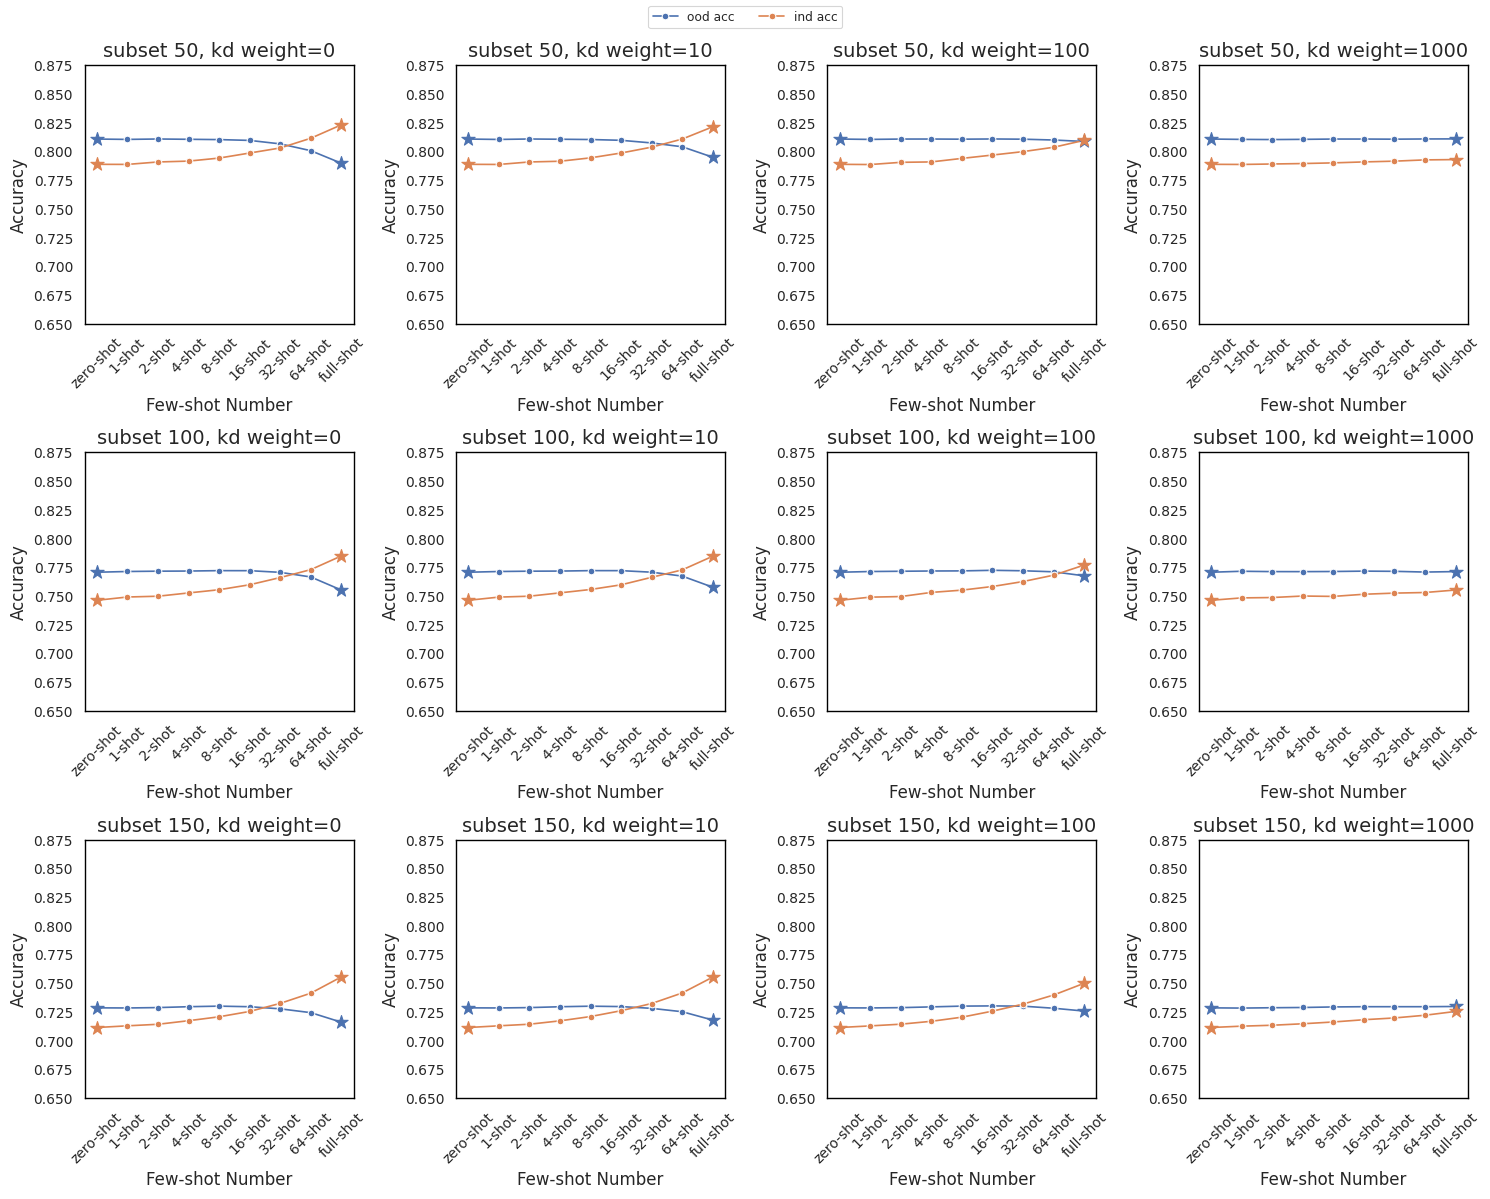

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

default_colors = sns.color_palette()
sns.set_theme(style="white", context="paper")
custom_style = {
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': True,
    'axes.spines.top': True,
    'axes.edgecolor': 'black',
    'axes.linewidth': 1.0,
    'grid.linestyle': '--',
    'grid.alpha': 0.7
}
# Updating matplotlib's rc settings with the custom style
plt.rcParams.update(custom_style)
plt.figure(dpi=200)
fig, axes = plt.subplots(3, 4, figsize=(15, 12))

sub = [50, 100, 150]
fews = [1, 2, 4, 8, 16, 32, 64]
x_loc = [0, 1, 2, 3, 4, 5, 6]
kds = [0.0, 10.0, 100.0, 1000.0]
kds_title = [0, 10, 100, 1000]
for j in range(3):
    for i, kd in enumerate(kds):
        table_dict = {'x':[], 'x_label':[], 'ood': [], 'ind': []}
        # zero-shot
        file_name=f'./ours/ViT-B-32_data_sub{sub[j]}.json'
        _, ood_acc, _, ind_acc, _, _ = read_results(file_name, sub=sub[j], line_num=-1)
        table_dict['x'].append(-1)
        table_dict['x_label'].append('zero-shot')
        table_dict['ood'].append(ood_acc)
        table_dict['ind'].append(ind_acc)

        for few, loc in zip(fews, x_loc):
            file_name=f'./ours/ViT-B-32_data_sub{sub[j]}_fewshot_{few}_kd{kd}.json'
            _, ood_acc, _, ind_acc, _, _ = read_results(file_name, sub=sub[j], line_num=-1)
            table_dict['x'].append(loc)
            table_dict['x_label'].append(f'{few}-shot')
            table_dict['ood'].append(ood_acc)
            table_dict['ind'].append(ind_acc)

        # local
        file_name=f'./ours/ViT-B-32_data_sub{sub[j]}_fewshot_full_kd{kd}.json'
        _, ood_acc, _, ind_acc, _, _ = read_results(file_name, sub=sub[j], line_num=-1)
        table_dict['x'].append(7)
        table_dict['x_label'].append('full-shot')
        table_dict['ood'].append(ood_acc)
        table_dict['ind'].append(ind_acc)

        df = pd.DataFrame(table_dict)
        print(df)

        sns.lineplot(data=df, x='x', y='ood', marker='o', label='ood acc', ax=axes[j, i], legend=False)
        sns.lineplot(data=df, x='x', y='ind', marker='o', label='ind acc', ax=axes[j, i], legend=False)

        axes[j, i].scatter(df['x'][0], df['ood'][0], color=default_colors[0], s=100, marker='*', zorder=5)
        axes[j, i].scatter(df['x'][0], df['ind'][0], color=default_colors[1], s=100, marker='*', zorder=5)
        axes[j, i].scatter(df['x'].iloc[-1], df['ood'].iloc[-1], color=default_colors[0], s=100, marker='*', zorder=5)
        axes[j, i].scatter(df['x'].iloc[-1], df['ind'].iloc[-1], color=default_colors[1], s=100, marker='*', zorder=5)

        axes[j, i].set_xticks(df['x'])
        axes[j, i].set_xticklabels(df['x_label'], rotation=45)

        axes[j, i].set_title(f'subset {sub[j]}, kd weight={kds_title[i]}', fontsize=14)
        axes[j, i].set_xlabel('Few-shot Number', fontsize=12)
        axes[j, i].set_ylabel('Accuracy', fontsize=12)

        axes[j, i].tick_params(axis='y', labelsize=10)
        axes[j, i].tick_params(axis='x', labelsize=10)

        axes[j, i].set_ylim(0.650, 0.875)

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.98])

plt.savefig('../../figures/local_adaptation.pdf')
plt.show()


In [11]:
def cal_num_ood_acc(test_data_num, acc):
    true_test_num = 0
    total_num = 0
    line_acc = []
    for i, line in enumerate(acc):
        true_test_num_line = 0
        total_num_line = 0
        for j, number in enumerate(line):
            if i != j:
                true_test_num += int(number * test_data_num[i])
                total_num += 100 * test_data_num[i]
                true_test_num_line += int(number * test_data_num[i])
                total_num_line += 100 * test_data_num[i]
        line_acc.append(true_test_num_line / total_num_line)
    total_acc = true_test_num / total_num
    return line_acc, total_acc

def cal_num_ind_acc(test_data_num, acc):
    true_test_num = 0
    total_num = 0
    line_acc = []
    for i, line in enumerate(acc):
        true_test_num_line = 0
        total_num_line = 0
        for j, number in enumerate(line):
            if i == j:
                true_test_num += int(number * test_data_num[i])
                total_num += 100 * test_data_num[i]
                true_test_num_line += int(number * test_data_num[i])
                total_num_line += 100 * test_data_num[i]
        line_acc.append(true_test_num_line / total_num_line)
    total_acc = true_test_num / total_num
    return line_acc, total_acc

def cal_avg_ood_acc(acc):
    true_test_num = 0
    total_num = 0
    line_acc = []
    for i, line in enumerate(acc):
        true_test_num_line = 0
        total_num_line = 0
        for j, number in enumerate(line):
            if i != j:
                true_test_num += number
                total_num += 100
                true_test_num_line += number
                total_num_line += 100
        line_acc.append(true_test_num_line / total_num_line)
    total_acc = true_test_num / total_num
    return line_acc, total_acc

def cal_avg_ind_acc(acc):
    true_test_num = 0
    total_num = 0
    line_acc = []
    for i, line in enumerate(acc):
        true_test_num_line = 0
        total_num_line = 0
        for j, number in enumerate(line):
            if i == j:
                true_test_num += number
                total_num += 100
                true_test_num_line += number
                total_num_line += 100
        line_acc.append(true_test_num_line / total_num_line)
    total_acc = true_test_num / total_num
    return line_acc, total_acc

def read_results(file_name, sub=10, line_num=-1):
    print(file_name)
    data_list = []
    with open(file_name) as f:
        for line in f:
            data = json.loads(line)
            data_list.append(data)
    result = data_list[line_num]
    if sub == 10:
        test_data_num = [308, 865, 974, 530, 1500, 174]
    elif sub == 50:
        test_data_num = [1811, 3530, 7370, 3122, 7500, 2096]
    elif sub == 100:
        test_data_num = [3737, 6255, 14873, 4794, 15000, 3349]
    elif sub == 150:
        test_data_num = [6266, 9436, 23170, 7693, 22500, 5353]

    total_test_data_num = sum(test_data_num)

    acc = result['acc']
    print('accuracy:')
    print(acc)

    line_acc, total_avg_ood_acc = cal_avg_ood_acc(acc)
    # print('the ood accuracy of each class(by average):')
    # print(line_acc)
    print('the total ood accuracy(by average):')
    print(total_avg_ood_acc)

    line_acc, total_num_ood_acc = cal_num_ood_acc(test_data_num, acc)
    # print('the ood accuracy of each class(by data number):')
    # print(line_acc)
    print('the total ood accuracy(by data number):')
    print(total_num_ood_acc)

    line_acc, total_avg_ind_acc = cal_avg_ind_acc(acc)
    # print('the ind accuracy of each class(by average):')
    # print(line_acc)
    print('the total ind accuracy(by average):')
    print(total_avg_ind_acc)

    line_acc, total_num_ind_acc = cal_num_ind_acc(test_data_num, acc)
    # print('the ind accuracy of each class(by data number):')
    # print(line_acc)
    print('the total ind accuracy(by data number):')
    print(total_num_ind_acc)
    rounds = result['converge_round']
    print('round:')
    print(rounds)
    times = result['total_train_time']
    print('times:')
    print(times)
    return total_avg_ood_acc, total_num_ood_acc, total_avg_ind_acc, total_num_ind_acc, rounds, times

./ours/ViT-B-32_data_sub50_threshold_0.1.json
accuracy:
[[90.9442, 83.2578, 93.0801, 87.9564, 48.76, 71.8034], [90.9442, 83.2578, 93.0801, 87.9564, 48.76, 71.8034], [90.9442, 83.2578, 93.0801, 87.9564, 48.76, 71.8034], [90.9442, 83.2578, 93.0801, 87.9564, 48.76, 71.8034], [90.9442, 83.2578, 93.0801, 87.9564, 48.76, 71.8034], [90.9442, 83.2578, 93.0801, 87.9564, 48.76, 71.8034]]
the total ood accuracy(by average):
0.7930031666666667
the total ood accuracy(by data number):
0.7993827519760903
the total ind accuracy(by average):
0.7930031666666667
the total ind accuracy(by data number):
0.7610983522749617
round:
231
times:
6.333151340484619
./ours/ViT-B-32_data_sub50_threshold_0.01.json
accuracy:
[[90.8338, 83.3144, 92.7001, 87.7643, 55.0267, 72.3282], [90.8338, 83.3144, 92.7001, 87.7643, 55.0267, 72.3282], [90.8338, 83.3144, 92.7001, 87.7643, 55.0267, 72.3282], [90.8338, 83.3144, 92.7001, 87.7643, 55.0267, 72.3282], [90.8338, 83.3144, 92.7001, 87.7643, 55.0267, 72.3282], [90.8338, 83.3144

<Figure size 1280x960 with 0 Axes>

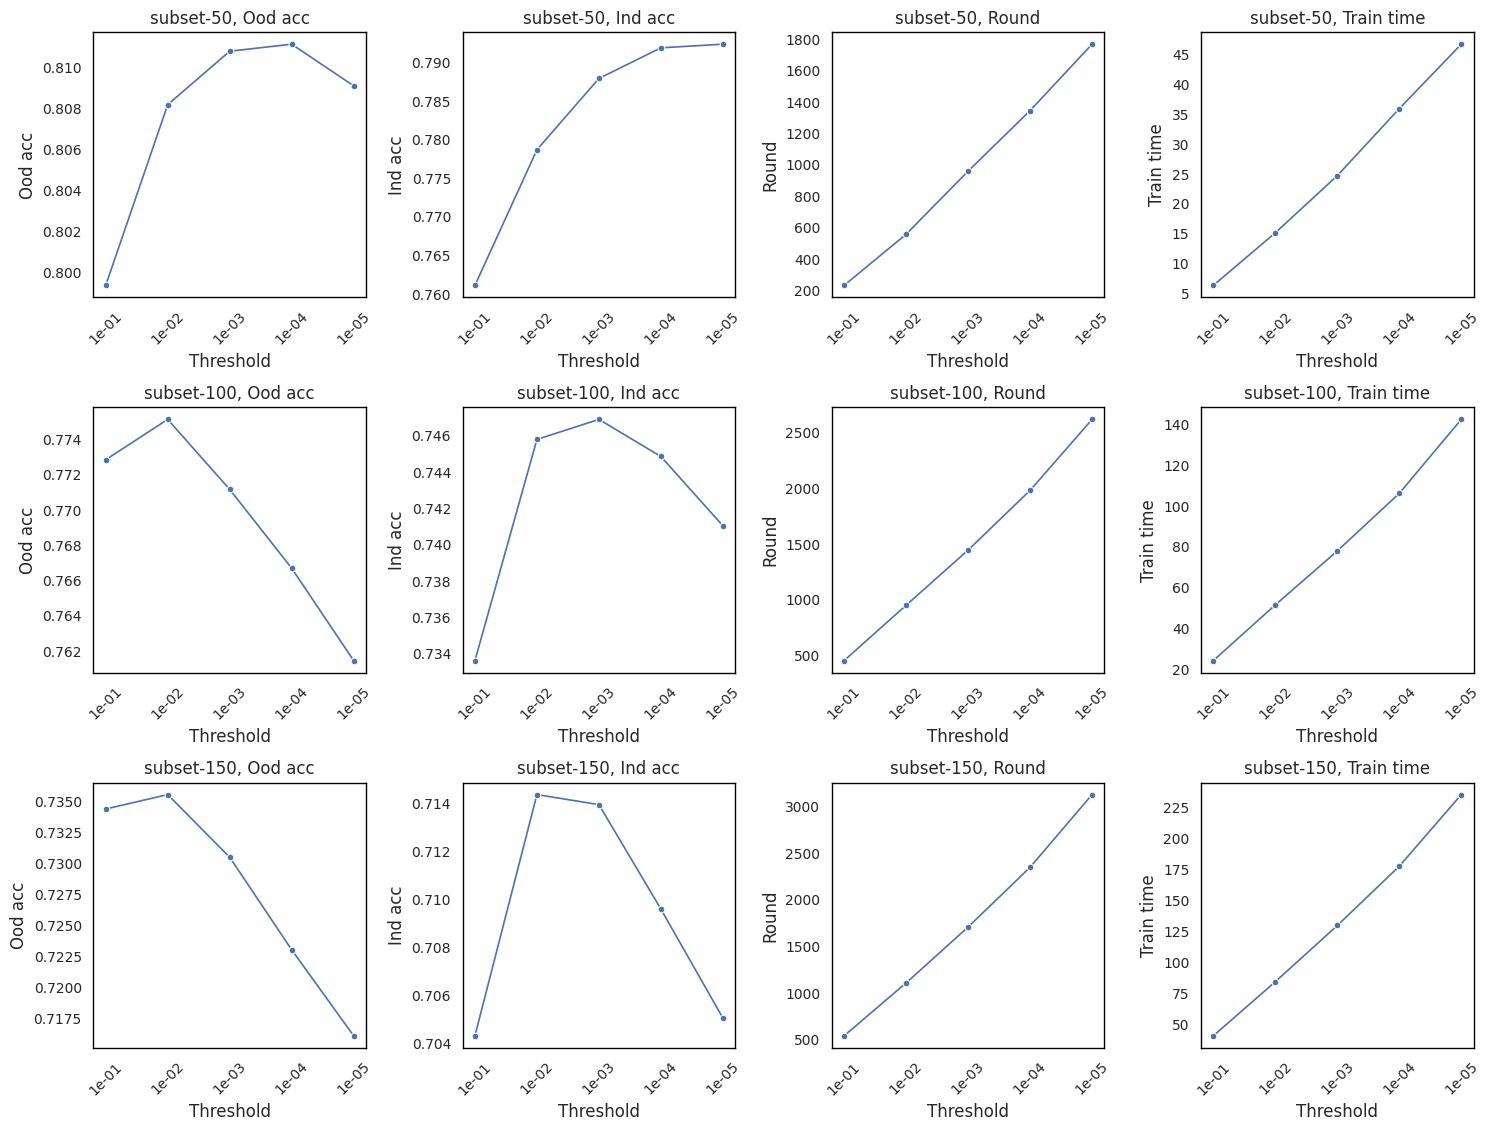

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

default_colors = sns.color_palette()
sns.set_theme(style="white", context="paper")
custom_style = {
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': True,
    'axes.spines.top': True,
    'axes.edgecolor': 'black',
    'axes.linewidth': 1.0,
    'grid.linestyle': '--',
    'grid.alpha': 0.7
}
# Updating matplotlib's rc settings with the custom style
plt.rcParams.update(custom_style)
plt.figure(dpi=200)
fig, axes = plt.subplots(3, 4, figsize=(15, 12))

sub = [50, 100, 150]
x_loc = [0, 1, 2, 3, 4]
threshold = [0.1, 0.01, 0.001, 0.0001, 1e-05]
threshold_x = ["1e-01", "1e-02", "1e-03", "1e-04", "1e-05"]
cat = ['ood', 'ind', 'round', 'time']
cat_label = ['Ood acc', 'Ind acc', 'Round', 'Train time']

for j, s in enumerate(sub):
    table_dict = {'x':[], 'x_label':[], 'ood': [], 'ind': [], 'round': [], 'time': []}
    for i, th in enumerate(threshold):
        file_name=f'./ours/ViT-B-32_data_sub{s}_threshold_{th}.json'
        _, ood_acc, _, ind_acc, round, time = read_results(file_name, sub=s, line_num=-1)
        table_dict['x'].append(i)
        table_dict['x_label'].append(threshold_x[i])
        table_dict['ood'].append(ood_acc)
        table_dict['ind'].append(ind_acc)
        table_dict['round'].append(round)
        table_dict['time'].append(time)

    df = pd.DataFrame(table_dict)
    print(df)

    for k in range(4):
        sns.lineplot(data=df, x='x', y=cat[k], marker='o', label=f'sub{s}', ax=axes[j, k], legend=False)
        axes[j, k].set_title(f'subset-{s}, {cat_label[k]}', fontsize=12)
        axes[j, k].set_xticks(df['x'])
        axes[j, k].set_xticklabels(df['x_label'], rotation=45)
        axes[j, k].set_xlabel('Threshold', fontsize=12)
        axes[j, k].set_ylabel(cat_label[k], fontsize=12)
        axes[j, k].tick_params(axis='y', labelsize=10)
        axes[j, k].tick_params(axis='x', labelsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('../../figures/ours_threshold.pdf')
plt.show()


Radar chart

In [3]:
file_name = './ours/ViT-B-32_domainnet_sub50_sra0.1_sramcluster.json'

In [4]:
def read_acc_diff_domains(file_name):
    data_list = []
    with open(file_name) as f:
        for line in f:
            data = json.loads(line)
            data_list.append(data)
    result = data_list[-1]
    return result['acc'][0]

read_acc_diff_domains(file_name)

[87.7416, 79.2351, 89.6201, 85.2979, 69.3067, 65.9351]

In [50]:
import plotly.express as px
import pandas as pd
import json

def radar_mours(sample_method, subset_size):
    file_name = [
        f'./ours/ViT-B-32_domainnet_sub{subset_size}_sra0.1_sram{sample_method}.json',
        f'./ours/ViT-B-32_domainnet_sub{subset_size}_sra0.3_sram{sample_method}.json',
        f'./ours/ViT-B-32_domainnet_sub{subset_size}_sra0.5_sram{sample_method}.json',
        f'./ours/ViT-B-32_domainnet_sub{subset_size}_sra0.7_sram{sample_method}.json',
        f'./ours/ViT-B-32_domainnet_sub{subset_size}_sra1.0_sramaverage.json',
    ]

    caption = [
        f'sample rate=10%, sample method={sample_method}',
        f'sample rate=30%, sample method={sample_method}',
        f'sample rate=50%, sample method={sample_method}',
        f'sample rate=70%, sample method={sample_method}',
        'sample method=average',
    ]

    # Redefining data and labels
    labels = ['Clipart', 'Painting', 'Real', 'Sketch', 'Quickdraw', 'Infograph']
    categories = [*labels, labels[0]]

    # Redefine data to fit Plotly
    data = []
    for f in file_name:
        acc = read_acc_diff_domains(f)
        data.append(acc)

    # 创建 DataFrame
    df = pd.DataFrame(data, columns=labels)
    df['FL setting'] = caption  # 添加模型名称为列

    # 将 DataFrame 从宽格式转换为长格式，适合 line_polar 使用
    df_long = df.melt(id_vars=['FL setting'], var_name='Category', value_name='Accuracy')

    # 绘制雷达图
    fig = px.line_polar(df_long, r='Accuracy', theta='Category', color='FL setting', line_close=True,
                        color_discrete_sequence=px.colors.qualitative.Dark24)

    # 更新布局
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[0, 100])
        ),
        width=800,  # 设置宽度
        height=800,  # 设置高度为与宽度相同
        font=dict(size=20),  # 设置字体大小
        showlegend=False,  # 显示图例
    )

    # 显示图形
    fig.show()

    fig.write_image(f"./{sample_method}_avg_sub{subset_size}.png", scale=4)

In [51]:
radar_mours(sample_method="cluster", subset_size=50)
radar_mours(sample_method="cluster", subset_size=100)
radar_mours(sample_method="cluster", subset_size=150)
radar_mours(sample_method="random", subset_size=50)
radar_mours(sample_method="random", subset_size=100)
radar_mours(sample_method="random", subset_size=150)


In [42]:
import plotly.express as px
import pandas as pd
import json

def radar_mours_compare_others(subset_size):
    file_name = [
        f'./local/ViT-B-32_domainnet_sub{subset_size}.json',
        f'./fedavg/ViT-B-32_domainnet_sub{subset_size}.json',
        f'./fedprox/ViT-B-32_domainnet_sub{subset_size}.json',
        f'./fedditto/ViT-B-32_domainnet_sub{subset_size}.json',
        f'./fedmoon/ViT-B-32_domainnet_sub{subset_size}.json',
        f'./fedproto/ViT-B-32_domainnet_sub{subset_size}.json',
        f'./fedavgDBE/ViT-B-32_domainnet_sub{subset_size}.json',
        f'./ours/ViT-B-32_domainnet_sub{subset_size}_sra1.0_sramaverage.json',
    ]

    caption = [
        'FL method=local',
        'FL method=FedAvg',
        'FL method=FedProx',
        'FL method=Ditto',
        'FL method=MOON',
        'FL method=FedProto',
        'FL method=DBE',
        'FL method=MPFT, sample method=average',
    ]

    # Redefining data and labels
    labels = ['Clipart', 'Painting', 'Real', 'Sketch', 'Quickdraw', 'Infograph']
    categories = [*labels, labels[0]]

    # Redefine data to fit Plotly
    data = []
    for f in file_name:
        acc = read_acc_diff_domains(f)
        data.append(acc)

    # 创建 DataFrame
    df = pd.DataFrame(data, columns=labels)
    df['FL setting'] = caption  # 添加模型名称为列

    # 将 DataFrame 从宽格式转换为长格式，适合 line_polar 使用
    df_long = df.melt(id_vars=['FL setting'], var_name='Category', value_name='Accuracy')

    # 绘制雷达图
    fig = px.line_polar(df_long, r='Accuracy', theta='Category', color='FL setting', line_close=True,
                        color_discrete_sequence=px.colors.qualitative.Dark24)

    # 更新布局
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[0, 100])
        ),
        width=800,  # 设置宽度
        height=800,  # 设置高度为与宽度相同
        font=dict(size=20),  # 设置字体大小
        showlegend=False
    )

    # 显示图形
    fig.show()

    fig.write_image(f"./ours_compare_others_sub{subset_size}.png", scale=4)

In [43]:
radar_mours_compare_others(subset_size=50)
radar_mours_compare_others(subset_size=100)
radar_mours_compare_others(subset_size=150)

In [9]:
import plotly.express as px
import pandas as pd
import json

file_name = [
    './ours/ViT-B-32_domainnet_sub150_sra0.1_sramcluster.json',
    './ours/ViT-B-32_domainnet_sub150_sra0.3_sramcluster.json',
    './ours/ViT-B-32_domainnet_sub150_sra0.5_sramcluster.json',
    './ours/ViT-B-32_domainnet_sub150_sra0.7_sramcluster.json',
    './ours/ViT-B-32_domainnet_sub150_sra1.0_sramaverage.json',
]

caption = [
    'sample rate=10%, sample method=cluster',
    'sample rate=30%, sample method=cluster',
    'sample rate=50%, sample method=cluster',
    'sample rate=70%, sample method=cluster',
    'sample method=average',
]

# Redefining data and labels
labels = ['Clipart', 'Painting', 'Real', 'Sketch', 'Quickdraw', 'Infograph']
categories = [*labels, labels[0]]

# Redefine data to fit Plotly
data = []
for f in file_name:
    acc = read_acc_diff_domains(f)
    data.append(acc)

# 创建 DataFrame
df = pd.DataFrame(data, columns=labels)
df['FL setting'] = caption  # 添加模型名称为列

# 将 DataFrame 从宽格式转换为长格式，适合 line_polar 使用
df_long = df.melt(id_vars=['FL setting'], var_name='Category', value_name='Accuracy')

# 绘制雷达图
fig = px.line_polar(df_long, r='Accuracy', theta='Category', color='FL setting', line_close=True,
                    color_discrete_sequence=px.colors.qualitative.Dark24)

# 更新布局
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 100])
    ),
    width=700,  # 设置宽度
    height=700,  # 设置高度为与宽度相同
)

# 显示图形
fig.show()

fig.write_image("./clu_avg_sub150.png", scale=4)

In [16]:
import plotly.express as px
import pandas as pd
import json

file_name = [
    './ours/ViT-B-32_domainnet_sub50_sra0.1_sramrandom.json',
    './ours/ViT-B-32_domainnet_sub50_sra0.1_sramcluster.json',
]

caption = [
    'sample rate=10%, sample method=random',
    'sample rate=10%, sample method=cluster',
]

# Redefining data and labels
labels = ['Clipart', 'Painting', 'Real', 'Sketch', 'Quickdraw', 'Infograph']
categories = [*labels, labels[0]]

# Redefine data to fit Plotly
data = []
for f in file_name:
    acc = read_acc_diff_domains(f)
    data.append(acc)

# 创建 DataFrame
df = pd.DataFrame(data, columns=labels)
df['FL setting'] = caption  # 添加模型名称为列

# 将 DataFrame 从宽格式转换为长格式，适合 line_polar 使用
df_long = df.melt(id_vars=['FL setting'], var_name='Category', value_name='Accuracy')

# 绘制雷达图
fig = px.line_polar(df_long, r='Accuracy', theta='Category', color='FL setting', line_close=True,
                    color_discrete_sequence=px.colors.qualitative.Dark24)

# 更新布局
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 100])
    ),
    title='Accuracy Across Different Domains',
    width=700,  # 设置宽度
    height=700,  # 设置高度为与宽度相同
)

# 显示图形
fig.show()

fig.write_image("./cluster_random_sample_10%.png", scale=4)

In [17]:
import plotly.express as px
import pandas as pd
import json

file_name = [
    './ours/ViT-B-32_domainnet_sub50_sra0.7_sramrandom.json',
    './ours/ViT-B-32_domainnet_sub50_sra0.7_sramcluster.json',
]

caption = [
    'sample rate=70%, sample method=random',
    'sample rate=70%, sample method=cluster',
]

# Redefining data and labels
labels = ['Clipart', 'Painting', 'Real', 'Sketch', 'Quickdraw', 'Infograph']
categories = [*labels, labels[0]]

# Redefine data to fit Plotly
data = []
for f in file_name:
    acc = read_acc_diff_domains(f)
    data.append(acc)

# 创建 DataFrame
df = pd.DataFrame(data, columns=labels)
df['FL setting'] = caption  # 添加模型名称为列

# 将 DataFrame 从宽格式转换为长格式，适合 line_polar 使用
df_long = df.melt(id_vars=['FL setting'], var_name='Category', value_name='Accuracy')

# 绘制雷达图
fig = px.line_polar(df_long, r='Accuracy', theta='Category', color='FL setting', line_close=True,
                    color_discrete_sequence=px.colors.qualitative.Dark24)

# 更新布局
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 100])
    ),
    title='Accuracy Across Different Domains',
    width=700,  # 设置宽度
    height=700,  # 设置高度为与宽度相同
)

# 显示图形
fig.show()

fig.write_image("./cluster_random_sample_70%.png", scale=4)

In [19]:
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd

# 定义类别
categories = ['指标1', '指标2', '指标3', '指标4', '指标5']

# 示例数据，共9组，每组对应一个雷达图
data = [
    [3, 4, 2, 5, 3],
    [2, 3, 4, 3, 5],
    [5, 2, 3, 4, 2],
    [4, 5, 2, 3, 4],
    [3, 2, 5, 4, 3],
    [2, 4, 3, 5, 2],
    [5, 3, 4, 2, 5],
    [4, 2, 5, 3, 4],
    [3, 5, 2, 4, 3]
]

# 创建3x3子图，类型为极坐标（polar）
fig = make_subplots(rows=3, cols=3, specs=[[{'type': 'polar'}]*3]*3)

# 添加每个雷达图到对应的子图位置
for idx, values in enumerate(data):
    df = pd.DataFrame({
        'category': categories + [categories[0]],  # 闭合图形
        'value': values + [values[0]]
    })
    # 使用 px.line_polar 创建雷达图
    fig_px = px.line_polar(df, r='value', theta='category', line_close=True)

    # 获取生成的 Trace
    trace = fig_px.data[0]

    # 计算子图位置
    row = idx // 3 + 1
    col = idx % 3 + 1

    # 将 Trace 添加到对应的子图位置
    fig.add_trace(trace, row=row, col=col)

    # 更新每个子图的坐标轴范围
    fig.update_polars(radialaxis=dict(range=[0, 5]), row=row, col=col)

# 更新布局
fig.update_layout(height=900, width=900, showlegend=False)

# 显示图形
fig.show()



In [25]:
import plotly.express as px
import pandas as pd
import json
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 假设您有一个函数来读取每个 JSON 文件中的准确率数据
def read_acc_diff_domains(file_name):
    data_list = []
    with open(file_name) as f:
        for line in f:
            data = json.loads(line)
            data_list.append(data)
    result = data_list[-1]
    return result['acc'][0]

file_name = [
    './ours/ViT-B-32_domainnet_sub50_sra0.1_sramrandom.json',
    './ours/ViT-B-32_domainnet_sub50_sra0.3_sramrandom.json',
    './ours/ViT-B-32_domainnet_sub50_sra0.5_sramrandom.json',
    './ours/ViT-B-32_domainnet_sub50_sra0.7_sramrandom.json',
    './ours/ViT-B-32_domainnet_sub50_sra1.0_sramaverage.json',
]

caption = [
    'sample rate=10%, sample method=random',
    'sample rate=30%, sample method=random',
    'sample rate=50%, sample method=random',
    'sample rate=70%, sample method=random',
    'sample method=average',
]

# 定义类别
labels = ['Clipart', 'Painting', 'Real', 'Sketch', 'Quickdraw', 'Infograph']
categories = labels + [labels[0]]  # 闭合雷达图

# 读取数据
data = []
for f in file_name:
    acc = read_acc_diff_domains(f)
    data.append(acc)

# 创建 DataFrame
df = pd.DataFrame(data, columns=labels)
df['FL setting'] = caption  # 添加模型名称为列

# 将 DataFrame 从宽格式转换为长格式，适合 line_polar 使用
df_long = df.melt(id_vars=['FL setting'], var_name='Category', value_name='Accuracy')

# 使用 px.line_polar 创建单个雷达图，并提取其数据
fig_single = px.line_polar(
    df_long,
    r='Accuracy',
    theta='Category',
    color='FL setting',
    line_close=True,
    color_discrete_sequence=px.colors.qualitative.Dark24
)

# 提取 Trace
traces = fig_single.data

# 创建 3x3 子图，类型为极坐标（polar）
fig = make_subplots(rows=3, cols=3, specs=[[{'type': 'polar'}]*3]*3)

# 添加每个雷达图到对应的子图位置
for row in range(1, 4):
    for col in range(1, 4):
        subplot_index = (row - 1) * 3 + col  # 从 1 到 9
        subplot_name = f'polar{subplot_index}' if subplot_index > 1 else 'polar'
        # 为每个子图添加所有的 Trace
        for trace in traces:
            # 创建 Trace 的副本
            trace_copy = trace
            # 设置 subplot 属性
            trace_copy['subplot'] = subplot_name
            # 添加 Trace 到对应的子图
            fig.add_trace(trace_copy, row=row, col=col)

# 更新每个子图的极坐标轴范围
for i in range(1, 10):
    polar_name = f'polar{i}' if i > 1 else 'polar'
    fig.layout[polar_name].update(
        radialaxis=dict(visible=True, range=[0, 100]),
        angularaxis=dict(rotation=90)  # 可选：调整起始角度
    )

# 更新布局
fig.update_layout(
    height=900,
    width=900,
    showlegend=False,  # 隐藏图例
    title='3*3 雷达图网格示例'
)

# 显示图形
fig.show()

# 保存图形
fig.write_image("./radar_grid.png", scale=4)


In [34]:
import plotly.express as px
import pandas as pd
import json
from plotly.subplots import make_subplots

# 定义读取准确率数据的函数
def read_acc_diff_domains(file_name):
    data_list = []
    with open(file_name) as f:
        for line in f:
            data = json.loads(line)
            data_list.append(data)
    result = data_list[-1]
    return result['acc'][0]

# 文件名和标签
file_name = [
    './ours/ViT-B-32_domainnet_sub50_sra0.1_sramrandom.json',
    './ours/ViT-B-32_domainnet_sub50_sra0.3_sramrandom.json',
    './ours/ViT-B-32_domainnet_sub50_sra0.5_sramrandom.json',
    './ours/ViT-B-32_domainnet_sub50_sra0.7_sramrandom.json',
    './ours/ViT-B-32_domainnet_sub50_sra1.0_sramaverage.json',
]

labels = ['Clipart', 'Painting', 'Real', 'Sketch', 'Quickdraw', 'Infograph']

# 读取数据（使用第一个文件作为示例）
acc = read_acc_diff_domains(file_name[0])

# 准备数据
categories = labels + [labels[0]]  # 闭合雷达图
accuracies = acc + [acc[0]]

df = pd.DataFrame({
    'Category': categories,
    'Accuracy': accuracies
})

# 创建单个雷达图的 Trace
fig_px = px.line_polar(df, r='Accuracy', theta='Category', line_close=True)
trace = fig_px.data[0]
trace.showlegend = False  # 隐藏全局图例
trace.name = 'Model Accuracy'  # 图例名称

# 创建3x3子图，并调整子图间距和添加子图标题
fig = make_subplots(
    rows=3,
    cols=3,
    specs=[[{'type': 'polar'}]*3]*3,
    horizontal_spacing=0.5,  # 调整左右间距
    vertical_spacing=0.5,    # 调整上下间距
    subplot_titles=[f'Subplot {i}' for i in range(1, 10)]  # 添加子图标题
)

# 添加Trace到每个子图
for i in range(1, 10):
    row = (i - 1) // 3 + 1
    col = (i - 1) % 3 + 1
    subplot_name = 'polar' if i == 1 else f'polar{i}'

    # 创建Trace的副本
    trace_copy = trace
    trace_copy['subplot'] = subplot_name

    # 添加Trace到对应的子图
    fig.add_trace(trace_copy, row=row, col=col)

    # 如果需要为每个子图添加特定的标题，可以在这里设置
    # fig.layout[subplot_name].title.text = f'Model Accuracy {i}'

# 更新整体布局
fig.update_layout(
    showlegend=False,  # 全局图例设为不显示
    title='3*3 雷达图网格示例',
)

# 显示图形
fig.show()

# 保存图形
fig.write_image("./radar_grid.png", scale=4)
